# House Price Prediction

#### Loading all the required libraries for House Price Prediction Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [66]:
train = pd.read_csv('train.csv')

In [67]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
train.shape

(1460, 81)

### EDA - Exploratory Data Analysis

#### Picking the Target Variable

In [69]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Trying to analyse the Skew and Kurtosis in the data
#### As we know skew helps to determine the symmetricity in the ditribution of the data and Kurtosis helps to determine the outliers in the data distribution.

In [70]:
print( " Skew value is : ", train.SalePrice.skew() )
print(" Kurtosis value is : ", train.SalePrice.kurtosis())

 Skew value is :  1.8828757597682129
 Kurtosis value is :  6.536281860064529


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

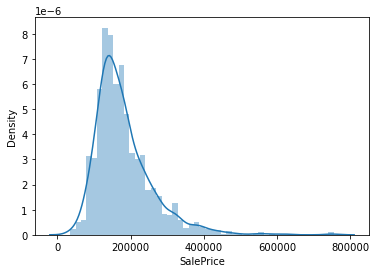

In [72]:
# plotting to observer the data distribution
sns.distplot(train.SalePrice)

#### Here the data is more concentrated on the left hand side. Hence it is positively skewed
##### Applying log transformation to bring this normal.

In [74]:
# log Transformation
train_log = np.log1p(train.SalePrice)

In [75]:
print(" Skew value now is : ", train_log.skew())
print(" Kurtosis value now is : ", train_log.kurtosis() )

 Skew value now is :  0.12134661989685333
 Kurtosis value now is :  0.809519155707878


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

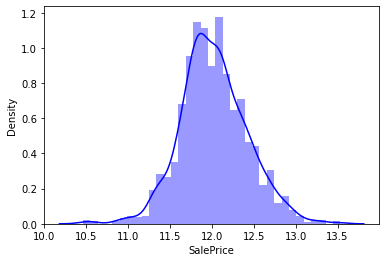

In [76]:
# plotting to obtain normal distribution
sns.distplot(train_log,color="Blue")

## Data Validation

In [77]:
## checking for the null values

train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [78]:
num_features = train.select_dtypes(include=[np.number])
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [79]:
## getting the data with dtype as object
cat_features = train.select_dtypes(include=np.object)
cat_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [81]:
# sorting the SalePrice Feature to get the correlation values in descending order.

print(num_features.corr()['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [82]:
train_corr = num_features.corr()

<AxesSubplot:>

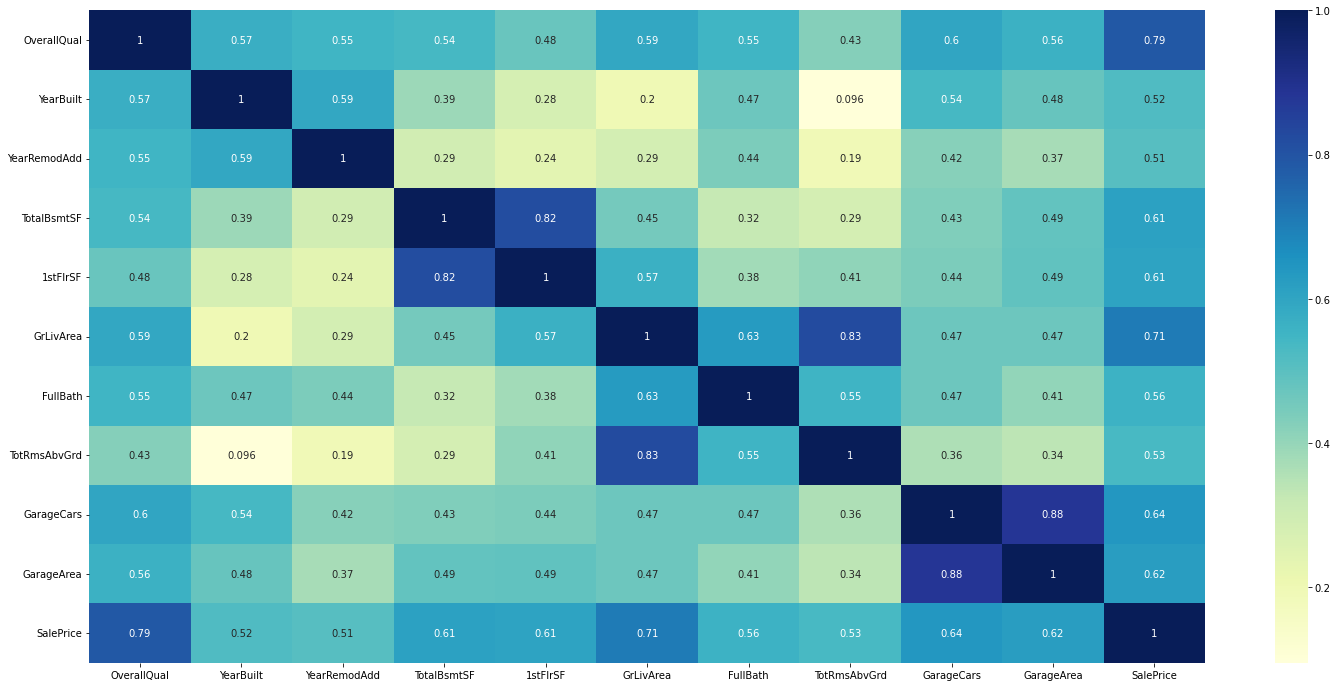

In [84]:
## getting the correlation metrics and plotting in heatmap

fig=plt.figure(figsize=(25,12))
top_features = train_corr.index[abs(train_corr['SalePrice'])>0.5]
sns.heatmap(train[top_features].corr(),annot=True,cmap='YlGnBu')

In [86]:
# Getting the top features by the correlation metrics.

print(train[top_features].corr()['SalePrice'].sort_values(ascending=False))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### Getting top features from correlation metrics

In [88]:
## top 5 features
train[top_features].head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


##### picking only the features which are having the correlation of above 60 percent for pair plot

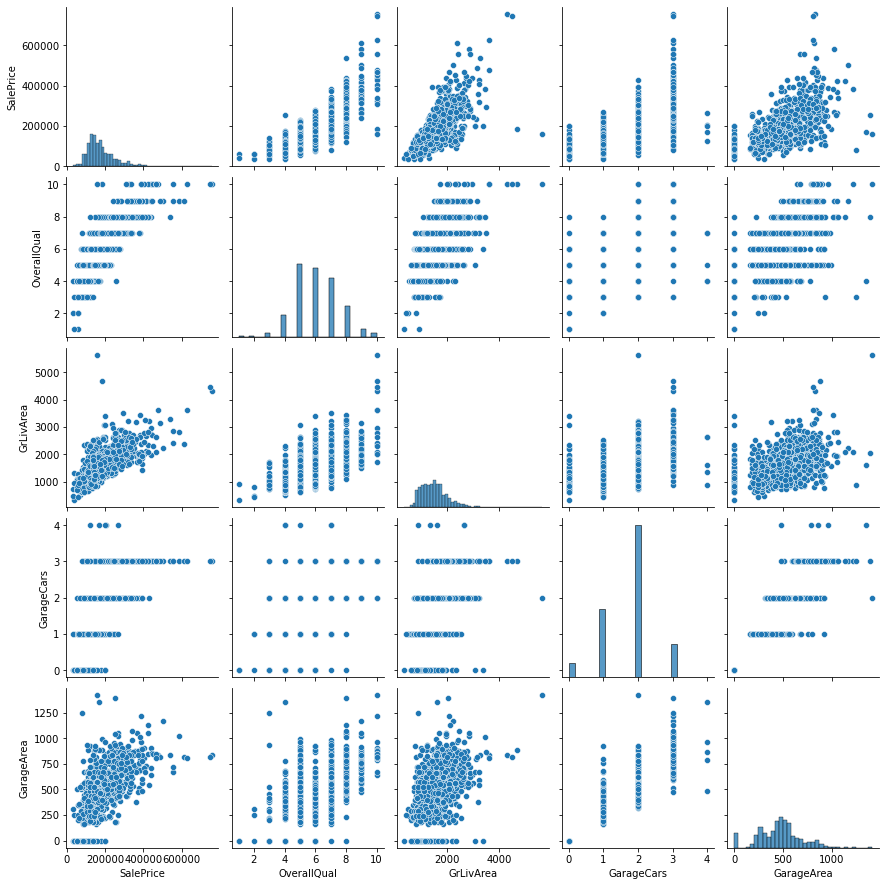

In [89]:
sns.pairplot(data=train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea']])

## Data visualization

#### Analysing the overall quality as it has the highest correlation with SalePrice among the numeric variables. This can determin the quality of the house.

In [90]:
quality = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Text(0, 0.5, 'Sale Price Median value')

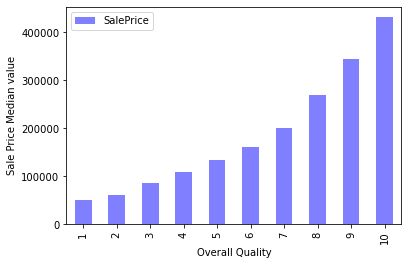

In [91]:
# plotting for Overall versus SalePrice
quality.plot(kind='bar',color='Blue',alpha = 0.5)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price Median value')

##### So the median saleprice increases as the overall quality increases.

<AxesSubplot:>

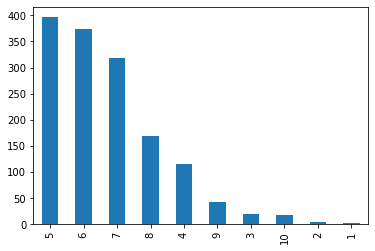

In [92]:
# Analysing the Overall Quality

train['OverallQual'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

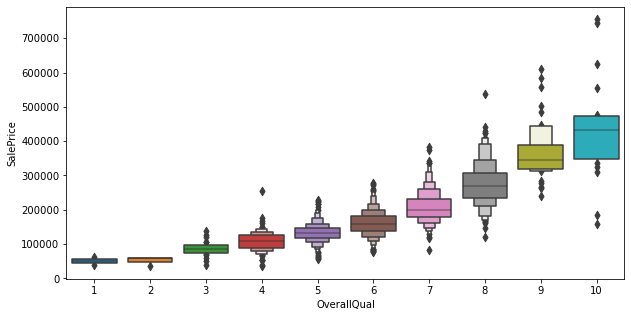

In [93]:
# Analysing for the SalePrice with Overall Quality. Also to see the outliers.
plt.figure(figsize=(10,5))
sns.boxenplot(train['OverallQual'],train['SalePrice'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

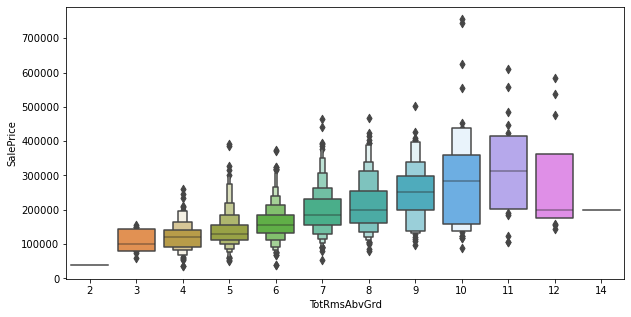

In [94]:
## Houses with more than 5 Berooms are in demands and also cost high.
plt.figure(figsize=(10,5))
sns.boxenplot(train['TotRmsAbvGrd'],train['SalePrice'])

<AxesSubplot:>

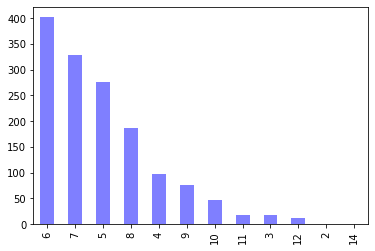

In [95]:
# Analysing for Room feature
train['TotRmsAbvGrd'].value_counts().plot(kind="bar",color = 'Blue', alpha = 0.5)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

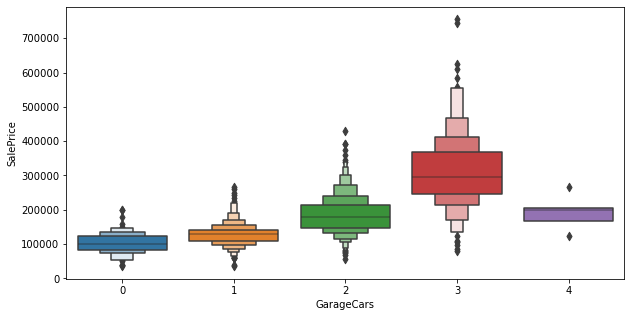

In [96]:
## Houses with two and three garages are most common whereas the Sale for four garages is dropping.
plt.figure(figsize=(10,5))
sns.boxenplot(train['GarageCars'],train['SalePrice'])

<AxesSubplot:>

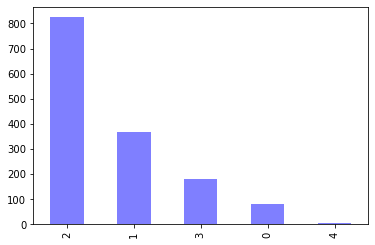

In [97]:
## Analysing for Garage Cards
train['GarageCars'].value_counts().plot(kind="bar",color = 'Blue', alpha = 0.5)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

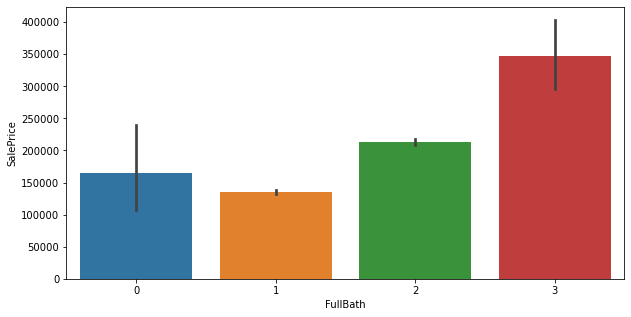

In [98]:
## SalePrice is high for three Full Bath Rooms
plt.figure(figsize=(10,5))
sns.barplot(train['FullBath'],train['SalePrice'])

<AxesSubplot:>

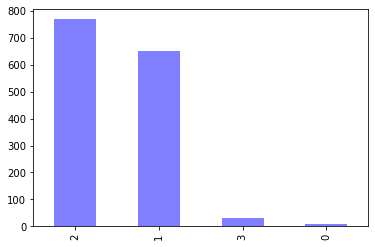

In [99]:
# Analysing for FullBath
train['FullBath'].value_counts().plot(kind="bar",color = 'Blue', alpha = 0.5)

##### Analysing for the GrLivArea
##### This is the second highest correlation with SalePrice. Ground Living is one of the important features for any House.

Text(0.5, 1.0, 'Sale Price Vs Ground Living Area')

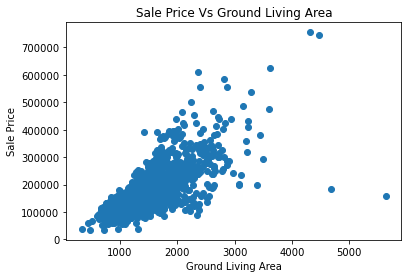

In [100]:
## Analysing with Scatter plot to understand better with their relationship.

plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price Vs Ground Living Area')

##### There seems to be heteroscedasticity in the above plot.And that could be due to outliers.

<AxesSubplot:xlabel='GrLivArea'>

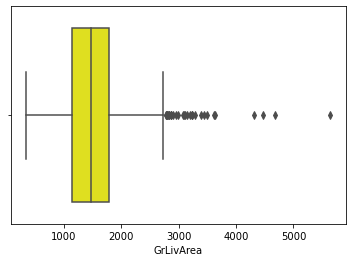

In [101]:
## plotting to find outliers.

sns.boxplot(train['GrLivArea'],color='yellow')

 maximum value :  5642
 minimum value :  334
 median value :  1464.0


<AxesSubplot:>

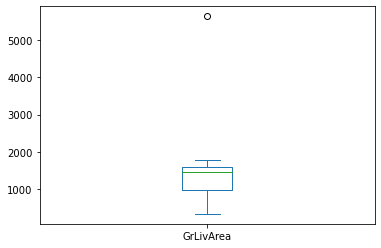

In [102]:
## We need to remove the outliers
print(' maximum value : ',train['GrLivArea'].max())
print(' minimum value : ',train['GrLivArea'].min())
print(' median value : ',train['GrLivArea'].median())
train['GrLivArea'].describe().plot(kind='box')

In [103]:
## dropping the outliers
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<4000000)].index)

Text(0.5, 1.0, 'Sale Price Vs Ground Living Area')

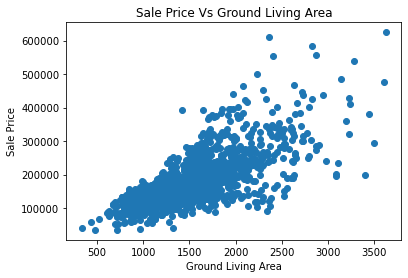

In [104]:
## Analysing with Scatter plot after removing the extreme values.

plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price Vs Ground Living Area')

##### Outliers are present in other features too. So Focusing on that too.

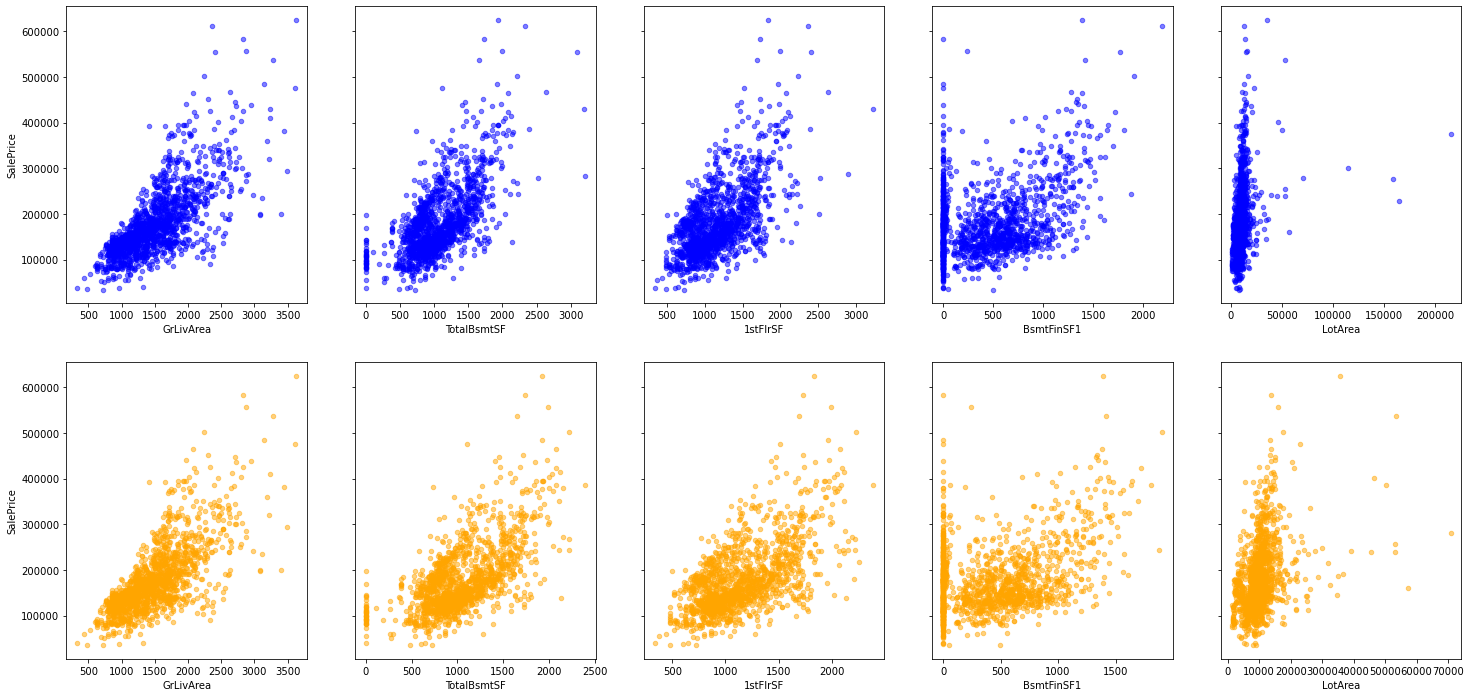

In [105]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(25, 12))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='Blue', alpha = 0.5)

# Delete outliers for affected columns
train = train[train['GrLivArea'] < 4000]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['BsmtFinSF1'] < 2000]


for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='Orange', alpha = 0.5)

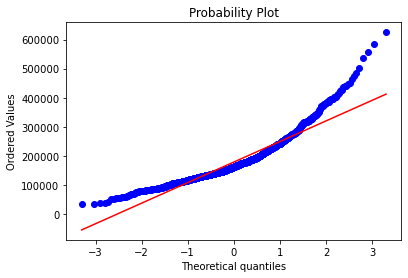

In [106]:
# As we know the data is highly distributed in the left and skewed in the right.
# plotting the probplot to view the relationship
res = stats.probplot(train['SalePrice'],plot = plt)

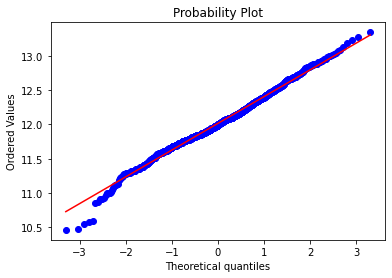

In [107]:
## Taking the log Transformation and plotting it.

train['SalePrice'] = np.log1p(train['SalePrice'])

res = stats.probplot(train['SalePrice'],plot = plt)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

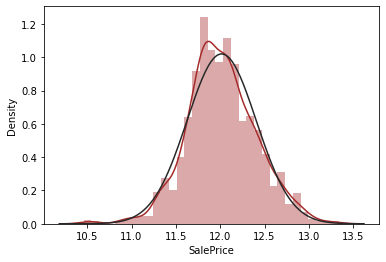

In [108]:
## Fitting it to normal after log transformation
sns.distplot(train['SalePrice'], fit = norm, color = 'Brown')

### Finding the missing data and fixing it.

In [109]:
missing_value_data = train.isnull().sum()
print(missing_value_data[missing_value_data.values>0].index)

## These columns are having the null values.

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


##### Calculating the percentage of the missing values and dropping the features which are having null values with 30 percent and above.

##### Dropping the features which are having more than 30% percent of the value as null or NA

In [110]:
Missing_value = missing_value_data[missing_value_data.values>0]
Missing_value_columns = missing_value_data[missing_value_data.values>0].index
#print(train[Missing_value_columns].value_counts)
print(Missing_value[(Missing_value/len(train)*100)>=30])


Alley          1353
FireplaceQu     690
PoolQC         1439
Fence          1165
MiscFeature    1392
dtype: int64


In [111]:
train = train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [112]:
from sklearn.preprocessing import LabelEncoder

columns = ('MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
	   'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition')
	   
for i in columns:
     lbl = LabelEncoder()
     lbl.fit(list(train[i].values)) 
     train[i] = lbl.transform(list(train[i].values))

In [113]:
## dropping the poorly performing features

train=train.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','MiscVal'])

## Data for Modelling

In [114]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [115]:
y = train.SalePrice
X = data.drop(['SalePrice', 'Id'], axis=1)

### splitting train and test data

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , test_size = 0.3,  random_state =100)

## Modelling

### Linear Regression

In [118]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()

lm.fit(X_train,y_train)

# making the prediction

y_pred = lm.predict(X_test)

R2_Score = r2_score(y_test,y_pred)

print ('The R2 Score of the Linear Regression is : ' , R2_Score )

print ('RMSE is: ', mean_squared_error(y_test,y_pred))

The R2 Score of the Linear Regression is :  0.9062430917996098
RMSE is:  0.015954513345872792


In [119]:
## Getting the Intercept and coefficients for the Model
print(lm.intercept_)
print(lm.coef_)

17.685302609248176
[ 6.06301367e-05 -2.47480844e-02  8.34046424e-05  5.36161268e-06
 -2.61878953e-03 -5.05896400e-03 -1.66020933e-03 -1.44765826e-02
 -3.49776881e-04  1.08694158e-03 -1.02562491e-02 -2.44427635e-03
  5.63523782e-02  4.70448348e-02  2.05850869e-03  5.90927596e-04
 -1.80012165e-03 -4.68984838e-03  4.07015935e-03  1.39361263e-02
  2.04958660e-05 -1.17183318e-02  9.33531111e-03  9.11515827e-03
 -1.69525891e-02  1.40616739e-02 -1.96462469e-03 -4.53125276e-04
  6.41455888e-05  7.48418355e-03  4.60581579e-05 -6.01480196e-06
  1.04188945e-04 -5.62152868e-03  7.54249413e-02 -2.00175855e-03
  1.29085859e-04  8.51731503e-05 -6.09404360e-05  1.53318574e-04
  2.58440758e-02  9.53118666e-04  2.68410022e-02  2.46843932e-02
 -4.44122153e-03 -7.09668155e-02 -1.85335694e-02  5.81523105e-03
  1.99484798e-02  1.81550070e-02 -7.83378399e-05 -3.35176218e-04
 -9.67818345e-03  4.28161915e-02 -4.83095278e-06 -2.31423639e-03
  5.36475470e-03  2.37491345e-02  8.32787603e-05  1.46574576e-04
  1.38

In [120]:
## Finding the RSS,Rsquared and MSE values for the train and test data.

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr_1 = r2_score(y_train,y_pred_train)
print('R2 train Score is : ',r2_train_lr_1)
metric.append(r2_train_lr_1)


r2_test_lr_1 = r2_score(y_test,y_pred_test)
print('R2 test Score is : ', r2_test_lr_1)
metric.append(r2_test_lr_1)


rss_train_1 = np.sum(np.square(y_train-y_pred_train))
print('RSS for train data is : ' , rss_train_1)
metric.append(rss_train_1)

rss_test_1 = np.sum(np.square(y_test-y_pred_test))
print('RSS for test data is : ' ,rss_test_1)
metric.append(rss_test_1)

mse_train_lr_1 = mean_squared_error(y_train,y_pred_train)
print('MSE for train data is : ' ,mse_train_lr_1)
metric.append(mse_train_lr_1**0.5)


mse_test_lr_1 = mean_squared_error(y_test,y_pred_test)
print('MSE for test data is : ' ,mse_test_lr_1)
metric.append(mse_test_lr_1**0.5)



R2 train Score is :  0.9169815891967786
R2 test Score is :  0.9062430917996098
RSS for train data is :  12.178278639970507
RSS for test data is :  6.924258792108792
MSE for train data is :  0.012057701623733175
MSE for test data is :  0.015954513345872792


In [121]:
## taking the list of alphas to tune the parameters

params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,10.0,20,50,100,200]}
print(params)

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10.0, 20, 50, 100, 200]}


In [122]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

#cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge,param_grid = params, scoring = 'neg_mean_absolute_error', cv=folds,return_train_score =True,verbose=1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# Print the best HyperParameter alpha
print(model_cv.best_params_)


{'alpha': 100}


In [124]:
# Fitting Ridge Model for alpha = 10 and printing coefficients which have been penalised

alpha_r = 100
ridge = Ridge(alpha=alpha_r)

ridge.fit(X_train,y_train)
print(ridge.coef_)

[-1.72794084e-04 -1.62536526e-02  5.09216701e-05  5.24715400e-06
 -3.08466982e-03 -3.70671528e-03 -1.67274650e-03 -5.09658089e-03
 -2.60864350e-04  6.40425556e-04 -5.91329256e-03 -1.33170617e-03
  5.29758975e-02  4.46081801e-02  2.52842961e-03  9.18182229e-04
 -9.73740664e-04 -4.05532250e-03  3.77967494e-03  1.17902880e-02
  1.91383317e-05 -8.39246987e-03  7.99812202e-03  4.43945404e-03
 -1.49406978e-02  1.23933640e-02 -1.82836116e-03 -1.37423142e-03
  7.40133216e-05  5.52577063e-03  4.51595335e-05 -5.52178104e-06
  1.13651074e-04 -6.82442548e-03  2.64230413e-02  8.72514283e-04
  1.11180782e-04  9.79208966e-05 -3.50190154e-05  1.74082664e-04
  1.02929035e-02 -1.58504601e-03  7.95720136e-03  1.17077363e-02
 -3.74976587e-03 -1.72240791e-02 -1.59928658e-02  2.74436879e-03
  1.95822513e-02  1.94702901e-02 -1.76556610e-03 -2.87950338e-04
 -1.10794067e-02  1.97781889e-02  7.17895936e-05 -2.62263649e-03
  2.94384449e-03  1.59631776e-02  8.80496870e-05  1.54542030e-04
  1.52389687e-04  5.87800

In [125]:
## Finding the RSS,Rsquared and MSE values for the train and test data after applying the Ridge Regularization.

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr_2 = r2_score(y_train,y_pred_train)
print('R2 score for training data :',r2_train_lr_2)
metric2.append(r2_train_lr_2)


r2_test_lr_2 = r2_score(y_test,y_pred_test)
print('R2 score for test data :',r2_test_lr_2)
metric2.append(r2_test_lr_2)


rss_train_2 = np.sum(np.square(y_train-y_pred_train))
print('RSS for training data :',rss_train_2)
metric2.append(rss_train_2)

rss_test_2 = np.sum(np.square(y_test-y_pred_test))
print('RSS score for test data :',rss_test_2)
metric2.append(rss_test_2)

mse_train_lr_2 = mean_squared_error(y_train,y_pred_train)
print('MSE for training data :',mse_train_lr_2)
metric2.append(mse_train_lr_2**0.5)


mse_test_lr_2 = mean_squared_error(y_test,y_pred_test)
print('MSE for test data :',mse_test_lr_2)
metric2.append(mse_test_lr_2**0.5)



R2 score for training data : 0.9142758648298612
R2 score for test data : 0.9063673040871204
RSS for training data : 12.57519138431804
RSS score for test data : 6.915085302491956
MSE for training data : 0.012450684538928752
MSE for test data : 0.01593337627302294


### Lasso Regression

In [126]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

#cross validation

folds = 5
model_cv_l = GridSearchCV(estimator = lasso,param_grid = params, scoring = 'neg_mean_absolute_error', cv=folds,return_train_score =True,verbose=1)
model_cv_l.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
# Print the best parameter for alpha
print(model_cv_l.best_params_)

{'alpha': 0.001}


In [128]:
# Fitting Lasso Model for alpha = 10 and printing coefficients which have been penalised

alpha_las = 0.001
lasso = Lasso(alpha=alpha_las)

lasso.fit(X_train,y_train)
print(lasso.coef_)

[-1.41390299e-04 -2.06865265e-02  8.14803075e-05  5.43328718e-06
 -2.65917786e-03 -1.35354619e-03 -1.14718925e-03 -0.00000000e+00
 -3.43451381e-04  0.00000000e+00 -5.22619377e-03 -9.25723928e-04
  5.92353025e-02  4.65509056e-02  2.40124000e-03  7.23534601e-04
 -0.00000000e+00 -3.82837699e-03  3.53803398e-03  1.15531815e-02
  1.09893513e-05 -6.56557510e-03  7.49433026e-03  3.53424457e-03
 -1.64401989e-02  1.29740834e-02 -8.01576424e-04 -5.88930183e-04
  1.33735888e-04  5.11742853e-03  1.02872011e-04  5.43501551e-05
  4.48499051e-05 -6.12467205e-03  5.34111645e-02 -0.00000000e+00
  2.50674347e-04  2.26663082e-04  8.67150579e-05  3.92021187e-05
  1.31218067e-02 -0.00000000e+00  7.03398440e-03  1.09279586e-02
 -0.00000000e+00 -2.92124555e-02 -1.79059787e-02  1.48009584e-03
  1.90334604e-02  1.91536229e-02 -4.34679994e-04 -2.24030808e-04
 -9.62870687e-03  3.22729376e-02  2.87017094e-05 -0.00000000e+00
  0.00000000e+00  1.74123229e-02  8.41439956e-05  1.59043248e-04
  1.47685743e-04  6.12270

In [129]:
## Finding the RSS,Rsquared and MSE values for the train and test data.

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_las = r2_score(y_train,y_pred_train)
print('R2 score for training data :',r2_train_las)
metric3.append(r2_train_las)


r2_test_las = r2_score(y_test,y_pred_test)
print('R2 score for test data :', r2_test_las)
metric3.append(r2_test_las)


rss_train_las = np.sum(np.square(y_train-y_pred_train))
print('RSS for training data :',rss_train_las)
metric3.append(rss_train_las)

rss_test_las = np.sum(np.square(y_test-y_pred_test))
print('RSS for test data :',rss_test_las)
metric3.append(rss_test_las)

mse_train_las = mean_squared_error(y_train,y_pred_train)
print('MSE for training data :',mse_train_las)
metric3.append(mse_train_las**0.5)


mse_test_las = mean_squared_error(y_test,y_pred_test)
print('MSE for test data :', mse_test_las)
metric3.append(mse_test_las**0.5)



R2 score for training data : 0.9156975785970994
R2 score for test data : 0.9072346798235644
RSS for training data : 12.366634917912675
RSS for test data : 6.851026726069003
MSE for training data : 0.012244192988032351
MSE for test data : 0.015785775866518442


##### The lasso Regularization has made some of the coefficients to zero

In [130]:
##### Creating a table which contains all the metrics

lr_table = {  'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train) ','RSS (Test)','MSE (Train)','MSE (Test)'],
'Linear Regression': metric  }

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name= 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric,ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.916982,0.914276,0.915698
1,R2 Score (Test),0.906243,0.906367,0.907235
2,RSS (Train),12.178279,12.575191,12.366635
3,RSS (Test),6.924259,6.915085,6.851027
4,MSE (Train),0.109808,0.111583,0.110653
5,MSE (Test),0.126311,0.126227,0.125641


##### Here, the lowest RSS value is with lasso Regression, R2 is also comparatively good here.

#### Lets Observe the changes in the coefficients after Regularization

In [131]:
betas = pd.DataFrame(index=X.columns)

betas.rows = X.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [132]:
pd.set_option('display.max_rows',None)
betas.head(70)

,Linear,Ridge,Lasso
MSSubClass,0.000061,-0.000173,-0.000141
MSZoning,-0.024748,-0.016254,-0.020687
LotFrontage,0.000083,0.000051,0.000081
LotArea,0.000005,0.000005,0.000005
LotShape,-0.002619,-0.003085,-0.002659
LandContour,-0.005059,-0.003707,-0.001354
LotConfig,-0.001660,-0.001673,-0.001147
LandSlope,-0.014477,-0.005097,-0.000000
Neighborhood,-0.000350,-0.000261,-0.000343
Condition1,0.001087,0.000640,0.000000


In [141]:
## Top 5 features which can determine the SalePrice of the House

betas.sort_values(by = 'Lasso',ascending=False).head(5).index

Index(['OverallQual', 'CentralAir', 'OverallCond', 'GarageCars',
       'SaleCondition'],
      dtype='object')

### So concluding from the Analysis that the below are the top 5 features which can make the SalePrice.

1. OverallQual
2. CentralAir
3. OverallCond
4. GarageCars
5. SaleCondition